In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [21]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Define paths to your data folders
data_folder = "/kaggle/input/flow-new/flow"
turbulent_folder = os.path.join(data_folder, "turbulent")
laminar_folder = os.path.join(data_folder, "laminar")

# Create folders for training and testing data
train_folder = "/kaggle/working/train"
test_folder = "/kaggle/working/test"
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)





In [22]:
# Function to split data into train and test folders with labels
def split_data(source, train, test, test_size):
    files = os.listdir(source)
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)
    
    # Create subfolders in train and test folders for turbulent and laminar images
    train_turbulent = os.path.join(train, "turbulent")
    train_laminar = os.path.join(train, "laminar")
    os.makedirs(train_turbulent, exist_ok=True)
    os.makedirs(train_laminar, exist_ok=True)
    
    test_turbulent = os.path.join(test, "turbulent")
    test_laminar = os.path.join(test, "laminar")
    os.makedirs(test_turbulent, exist_ok=True)
    os.makedirs(test_laminar, exist_ok=True)
    
    for file_name in train_files:
        if source == turbulent_folder:
            shutil.copy(os.path.join(source, file_name), os.path.join(train_turbulent, file_name))
        elif source == laminar_folder:
            shutil.copy(os.path.join(source, file_name), os.path.join(train_laminar, file_name))
        
    for file_name in test_files:
        if source == turbulent_folder:
            shutil.copy(os.path.join(source, file_name), os.path.join(test_turbulent, file_name))
        elif source == laminar_folder:
            shutil.copy(os.path.join(source, file_name), os.path.join(test_laminar, file_name))

In [41]:
# Set the ratio of data to be used for testing
test_size = 0.4

# Split data into train and test for turbulent flow images
split_data(turbulent_folder, train_folder, test_folder, test_size)

# Split data into train and test for laminar flow images
split_data(laminar_folder, train_folder, test_folder, test_size)


In [42]:
train_contents = os.listdir(train_folder)

print(train_contents[1])

turbulent


In [43]:
laminar_train = os.path.join(train_folder, train_contents[0])

# List the contents of the laminar folder
laminar_contents = os.listdir(laminar_train)

print(laminar_contents[0])

laminar_0_1624..png


In [44]:
# from PIL import Image
# image_path = laminar_contents[0]
# image = Image.open(image_path)
    
# # Display the image
# plt.imshow(image)
# plt.axis('off')  # Turn off axis
# plt.show()

In [45]:
# Constants
IMAGE_WIDTH = 266
IMAGE_HEIGHT = 128
BATCH_SIZE = 32
EPOCHS = 20

# # Data directories
# train_dir = "/kaggle/input/covid-xray/covid data/train"
# test_dir = "/kaggle/input/covid-xray/covid data/test"
train_contents = os.listdir(train_folder)
test_contents = os.listdir(test_folder)

In [46]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(266, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(266, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 227 images belonging to 2 classes.
Found 163 images belonging to 2 classes.


In [47]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(266, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=15,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 596ms/step - accuracy: 0.4528 - loss: 2.8044 - val_accuracy: 0.5562 - val_loss: 0.7358
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6875 - loss: 0.7019 - val_accuracy: 0.6667 - val_loss: 1.5397
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.4672 - loss: 2.2768 - val_accuracy: 0.5437 - val_loss: 1.3925
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 1.6526 - val_accuracy: 0.3333 - val_loss: 1.4229
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.6144 - loss: 0.9611 - val_accuracy: 0.5562 - val_loss: 0.9317
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 1.6552 - val_accuracy: 1.0000 - val_loss: 0.2483
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.6569 - loss: 0.9650 - val_accuracy: 0.8250 - val_loss: 0.4400
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.5623 - val_accuracy: 0.3333 - val_loss: 1.0863

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9509 - loss: 0.1920
Test Accuracy: 0.9447852969169617


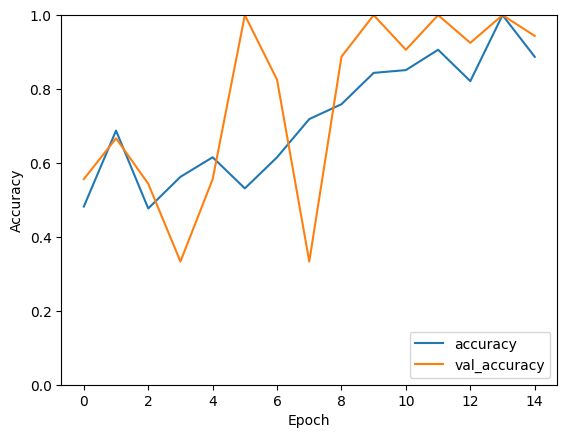

In [48]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
# Plot results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [49]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(266, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(2, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=13,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

Epoch 1/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 587ms/step - accuracy: 0.5675 - loss: 1.8882 - val_accuracy: 0.5312 - val_loss: 3.3202
Epoch 2/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6250 - loss: 2.7407 - val_accuracy: 0.6667 - val_loss: 38.0343
Epoch 3/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.5692 - loss: 1.8818 - val_accuracy: 0.5312 - val_loss: 1.2971
Epoch 4/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5625 - loss: 1.2790 - val_accuracy: 0.6667 - val_loss: 61.4535
Epoch 5/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.5599 - loss: 0.8948 - val_accuracy: 0.6125 - val_loss: 0.6366
Epoch 6/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 134.8117 - val_accuracy: 0.6667 - val_loss: 53.7904
Epoch 7/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.6256 - loss: 1.6401 - val_accuracy: 0.5500 - val_loss: 0.6891
Epoch 8/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.7077 - val_accuracy: 0.3333 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6606 - loss: 0.7802
Test Accuracy: 0.6932515501976013


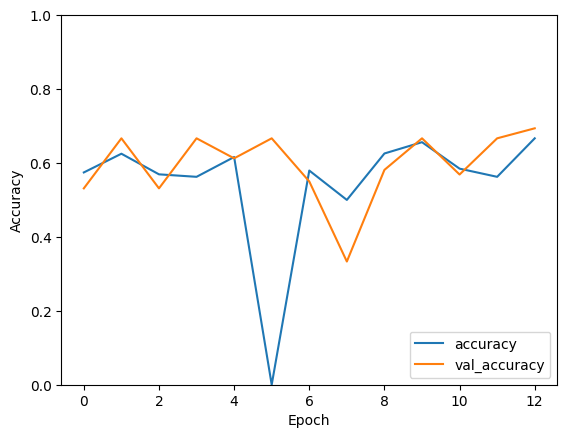

In [50]:
# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(test_generator)
print("Test Accuracy:", test_acc)
# Plot results
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [51]:
# Model architecture
model3 = Sequential([
    Conv2D(32, (3, 3), activation='sigmoid', input_shape=(266, 128, 3)),
    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='sigmoid'),
    Conv2D(128, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='sigmoid'),
    Conv2D(256, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(500, activation='sigmoid'),
    Dropout(0.4),
    Dense(2, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=13,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

Epoch 1/13
1/7 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 1.0000 - loss: 0.2794

W0000 00:00:1715436894.341395     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 717ms/step - accuracy: 0.5620 - loss: 2.4937 - val_accuracy: 0.4812 - val_loss: 0.7206
Epoch 2/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4375 - loss: 0.9946 - val_accuracy: 0.0000e+00 - val_loss: 0.8931
Epoch 3/13


W0000 00:00:1715436899.123351     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.4380 - loss: 0.9756 - val_accuracy: 0.5312 - val_loss: 0.7327
Epoch 4/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.7947 - val_accuracy: 0.3333 - val_loss: 0.9085
Epoch 5/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.4871 - loss: 0.9172 - val_accuracy: 0.5312 - val_loss: 0.7141
Epoch 6/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 0.8843 - val_accuracy: 0.3333 - val_loss: 0.7945
Epoch 7/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.5454 - loss: 0.8096 - val_accuracy: 0.4688 - val_loss: 0.7189
Epoch 8/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.7034 - val_accuracy: 0.6667 - val_loss: 0.6489
Epoch 9/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.5313 - loss: 0.8610 - val_accuracy: 0.5250 - val_loss: 0.6921
Epoch 10/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4688 - loss: 0.8665 - val_accuracy: 0.6667 - val_loss: 0.6716
Epoch 11/1

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.5282 - loss: 0.6921
Test Accuracy: 0.5276073813438416


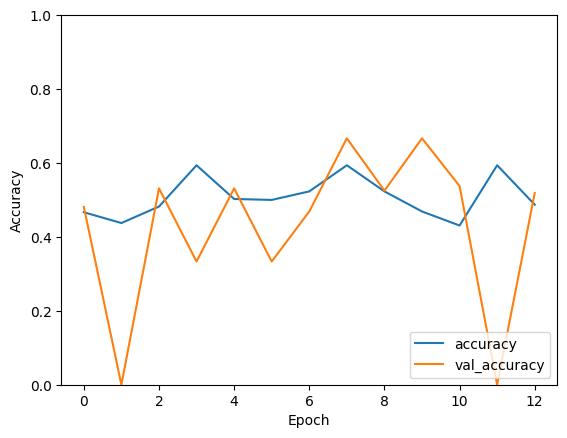

In [52]:
# Evaluate the model on test data
test_loss, test_acc = model3.evaluate(test_generator)
print("Test Accuracy:", test_acc)
# Plot results
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [53]:

# Model architecture
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(266, 128, 3)),
    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    Conv2D(512, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(2, activation='softmax')
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model4.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=13,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

Epoch 1/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.5027 - loss: 38.2179

W0000 00:00:1715436933.280550     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 785ms/step - accuracy: 0.5027 - loss: 39.1293 - val_accuracy: 0.5312 - val_loss: 12.1687
Epoch 2/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4688 - loss: 11.8572 - val_accuracy: 0.3333 - val_loss: 410.9415
Epoch 3/13


W0000 00:00:1715436935.261654     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.5200 - loss: 34.2306 - val_accuracy: 0.5750 - val_loss: 0.9480
Epoch 4/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4062 - loss: 1.8119 - val_accuracy: 0.3333 - val_loss: 1004.7393
Epoch 5/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.5499 - loss: 0.9772 - val_accuracy: 0.5562 - val_loss: 0.7781
Epoch 6/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3333 - loss: 928.2954 - val_accuracy: 0.3333 - val_loss: 82.5209
Epoch 7/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.4296 - loss: 12.1888 - val_accuracy: 0.4187 - val_loss: 0.7369
Epoch 8/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4688 - loss: 0.8621 - val_accuracy: 0.3333 - val_loss: 294.3604
Epoch 9/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.5078 - loss: 6.4339 - val_accuracy: 0.4750 - val_loss: 1.2275
Epoch 10/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5312 - loss: 1.2651 - val_accuracy: 0.3333 - val_loss: 383.563

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5298 - loss: 3.6822
Test Accuracy: 0.5214723944664001


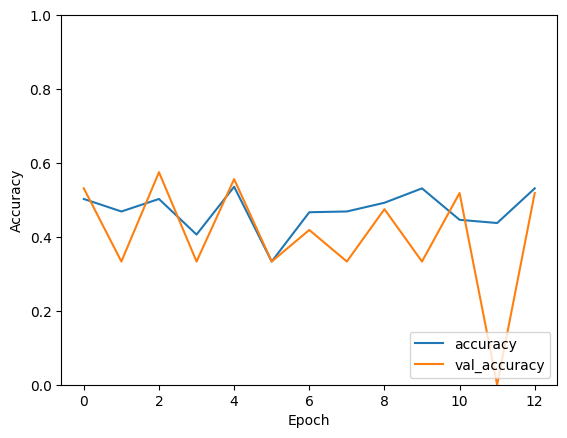

In [54]:
# Evaluate the model on test data
test_loss, test_acc = model4.evaluate(test_generator)
print("Test Accuracy:", test_acc)
# Plot results
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [55]:

# Model architecture
model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(266, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history5 = model5.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=15,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 601ms/step - accuracy: 0.5489 - loss: 1.3165 - val_accuracy: 0.4875 - val_loss: 0.6997
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.7151 - val_accuracy: 0.6667 - val_loss: 0.5922
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.4548 - loss: 0.7600 - val_accuracy: 0.6375 - val_loss: 0.6294
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 0.6714 - val_accuracy: 0.3333 - val_loss: 0.6684
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.6286 - loss: 0.6097 - val_accuracy: 0.8125 - val_loss: 0.4505
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3333 - loss: 0.7806 - val_accuracy: 1.0000 - val_loss: 0.1496
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.7170 - loss: 0.5670 - val_accuracy: 0.7063 - val_loss: 0.4890
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.5940 - val_accuracy: 0.6667 - val_loss: 0.4818

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9491 - loss: 0.1297
Test Accuracy: 0.9509202241897583


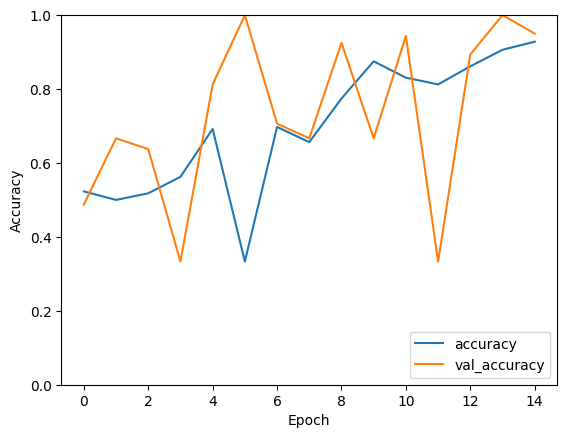

In [56]:
test_loss, test_acc = model5.evaluate(test_generator)
print("Test Accuracy:", test_acc)
# Plot results
plt.plot(history5.history['accuracy'], label='accuracy')
plt.plot(history5.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()